<a href="https://colab.research.google.com/github/CWanjohi/SimpleImageClassifier/blob/master/DIP_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
Primary Objective: Create CNN model. Use the model to classify handwritten digits.
Secondary: CNN to generate artistic work.

# Workflow
1. How to load the MNIST dataset and examine structure.
  *   Use any library to load the dataset- Tensorflow,PyTorch.
  *   Examine shape, size and quantity(Image_processing).
  *   View some random sample using OpenCV,matplotlib etc. of the handwritten digits and complexity of the images.

2. Use numpy etc. to prepare the dataset for training.
  *  Ensure the data format and shape is appropriate for the model's input (one-hot encoding).
  *   Ensure data normalization.
3. Create a CNN model.
  *   Input image-28x28x1 
  *   2 convolutional layers (kernel size 3x3). 1st will have 64 filters, 2nd will have 32. Use ReLU (Rectified Linear Unit) as an activation function.
  *   Max pooling 2x2
  *   Dropout rate-0.25
  *   Use dense layer with 128 outputs
  *   Add dropout layer using rate setting-0.5
  *   Add the final dropout layer that indicates the class probabilities

4. Train model using MNIST dataset.
  *   train for 10 epochs with batch size- 32

5. Plot graphs to show how training and validation loss and accuracy changed with respect to the epochs completed.

6. Save the model for future use in the 2nd part.
7. Test model using random samples training set.














# Deliverable
Jupyter notebook to document the workflow. View samples from the dataset, convert to appropriate format for the deep learning library.

# Code




In [ ]:
#load dataset
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#display data samples from training and test data.

print("Initial dimensions and shape of x_train: ",str(x_train.shape))
print("Total number of samples in training data: ",str(len(x_train)))
print("Number of labels in training data: ",str(len(y_train)))

print("Initial dimensions and shape of test data: ",str(x_test.shape),"\n")
print("Total number of samples in test data: ",str(len(x_test)))
print("Number of labels in test data: ",str(len(x_test)))

print("Dimension of training data: ",str(x_train[0].shape))
print("Labels of training data ",str(y_train.shape))

print("Dimension of test data: ",str(x_test[0].shape))
print("labels of test data: ",str(y_test.shape))

Initial dimensions and shape of x_train:  (60000, 28, 28)
Total number of samples in training data:  60000
Number of labels in training data:  60000
Initial dimensions and shape of test data:  (10000, 28, 28) 

Total number of samples in test data:  10000
Number of labels in test data:  10000
Dimension of training data:  (28, 28)
Labels of training data  (60000,)
Dimension of test data:  (28, 28)
labels of test data:  (10000,)


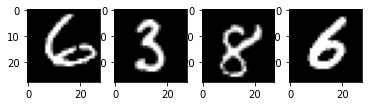

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Objective: View random samples using OpenCV,matplotlib etc. of the handwritten digits and complexity of the images.
#plot 6 images using the subplot function.
#set the colormap to grey. Since the image dataset is grayscale/black and white.
plt.subplot(141)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number],cmap=plt.get_cmap('gray'))

plt.subplot(142)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(143)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(144)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

Prepare the dataset using keras
Keras requires our data in a 4-D shape (60000,28,28,1). We loaded the data as a 3-D shape (60000,28,28).
We need our labels to be one-hot encoded into the data

In [ ]:
#store the data's rows and columns
image_rows = x_train[0].shape[0]
image_columns = x_train[0].shape[1]

#get the data into the right shape, 4-D tensor.
x_train = x_train.reshape(x_train.shape[0],image_rows,image_columns,1)
x_test = x_test.reshape(x_test.shape[0],image_rows,image_columns,1)

#store the shape of a single image for future use 
input_shape = (image_rows,image_columns,1)

#change image type to float32 from unsignedint
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range from 0-255 to 0-1
x_train /= 255.0 
x_test /= 255.0

print("X_train shape: ",x_train.shape)
print(x_train.shape[0], "x_train samples")
print(x_test.shape[0], "x_test samples")

X_train shape:  (60000, 28, 28, 1)
60000 x_train samples
10000 x_test samples


In [ ]:
#Perform One-Hot Encoding of the data labels
from tensorflow.keras.utils import to_categorical

#one-hot encode for the outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#count the number of columns in the OHE matrix
print("Number of classes: " + str(y_test.shape[1]))
num_classes = y_test.shape[1] #classed the images as images for 1,2,3,4,...,10

Number of classes: 10


Creating the CNN model

In [ ]:
#input is an image 28x28 as grayscale

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.backend import backend as K
from tensorflow.keras.optimizers import SGD

#What's the criteria used in determining number of filters in the convolutional layers?
#-> https://www.quora.com/What-is-a-filter-in-the-context-of-Convolutional-Neural-Networks

model = Sequential()

#the first layer-filter size=32 which reduces our layer size to 26*26*32
# use ReLU as activation function. Input shape is 28x28x1

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

#second layer. Filter size=64. Reduces the layer size to 24*24*64
model.add(Conv2D(64, kernel_size=(3,3),activation ='relu'))

#specify a max_pool with a size of 2*2. Reduces the layer size to 12*12*64
model.add(MaxPooling2D(pool_size=(2,2)))

#dropout to reduce Overfitting
model.add(Dropout(0.25))

#flatten the tensor before being passed to the output layer
#Flattening a tensor reshapes the tensor to have the shape that is equal to the number of elements contained in the tensor.
#It goes from 12*12*64 to 9612*1

model.add(Flatten())

#use another dropout layer
model.add(Dropout(0.5))

#create a fully-connected/Dense layer
model.add(Dense(num_classes, activation='softmax'))

#compile the model which create an object that store the model.
#set the optimizer to use stochastic gradient descent; learning rate=0.01
#set the loss function to be categorical_crossentropy as it's suitable for multiclass problems.
#Finally, the metrics(to judge the model's performance) we use accuracy.
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

#the summary function can be used to show the models layers and parameters
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

Model training

In [ ]:
batch_size = 32
epochs = 10

#store the results for plotting later on.
#in the fit function, we specify the dataset as x_train and y_train.
#batch size can be from 16-128(RAM intensive)
#the number of epochs(learning iterations) is usually 10-100
#the validation dataset is (x_test,y_test)
# verbose=1 to set the training to outputperformance metrics every epoch.

history = model.fit(x_train,y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test,y_test))

#obtain the acurraacy using the evaluative function
score = model.evaluate(x_test,y_test,verbose=0)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])

Epoch 1/10
1875/1875 [==============================] - 168s 90ms/step - loss: 0.5145 - accuracy: 0.8449 - val_loss: 0.2315 - val_accuracy: 0.9351
Epoch 2/10
1875/1875 [==============================] - 168s 89ms/step - loss: 0.2248 - accuracy: 0.9340 - val_loss: 0.1272 - val_accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.1499 - accuracy: 0.9563 - val_loss: 0.0936 - val_accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.1207 - accuracy: 0.9642 - val_loss: 0.0764 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 164s 88ms/step - loss: 0.1041 - accuracy: 0.9683 - val_loss: 0.0664 - val_accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0929 - accuracy: 0.9722 - val_loss: 0.0594 - val_accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0860 - accuracy: 0.9748 - val_loss: 0

Plot the training progress

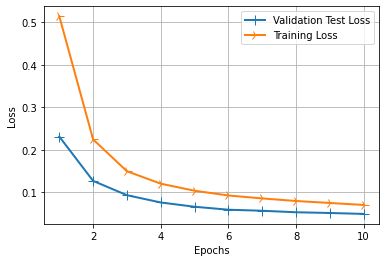

In [ ]:
#plot the loss chart.
#Use history object to get our saved performance. create a history dict that will contain history.history.
history_dict = history.history
#Extract the loss and validation.
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']

#get number of epochs and create an array using range() function
epoch = range(1,len(loss_values)+1)

#plot line charts for both validation
line1 = plt.plot(epoch,validation_loss_values, label="Validation Test Loss")
line2 = plt.plot(epoch, loss_values, label = "Training Loss")

plt.setp(line1,linewidth=2.0,marker = '+', markersize= 10.0)
plt.setp(line2,linewidth=2.0,marker = '4', markersize= 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

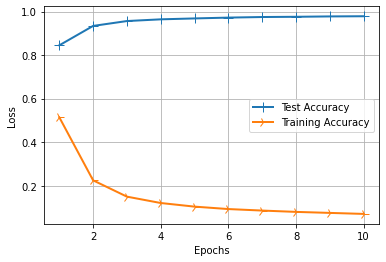

In [ ]:
#plot accuracy curve

accuracy_values = history_dict['accuracy']
accuracy_loss_values = history_dict['val_accuracy']


#get number of epochs and create an array using range() function
epoch = range(1,len(accuracy_values)+1)

line1 = plt.plot(epoch, accuracy_values, label = "Test Accuracy")
line2 = plt.plot(epoch, loss_values, label = "Training Accuracy")

plt.setp(line1,linewidth=2.0,marker = '+', markersize= 10.0)
plt.setp(line2,linewidth=2.0,marker = '4', markersize= 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#save the model
model.save('MNIST_Simple_CNN_10-Epoch.h5')

6	4	5	9	6	

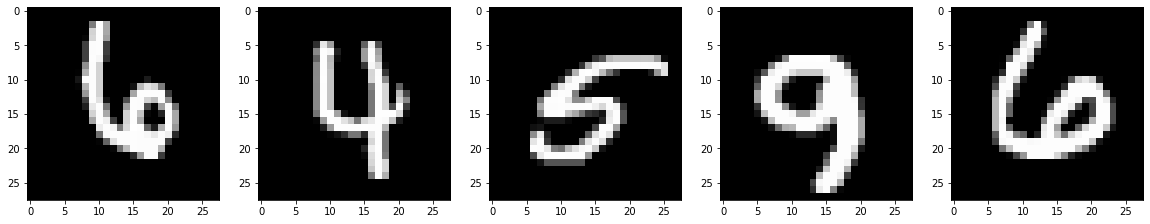

In [ ]:
#test using random data
from tensorflow.keras.models import load_model
classifier = load_model('MNIST_Simple_CNN_10-Epoch.h5')

figure = plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_index = np.random.randint(0, len(x_test))
  plt.imshow(x_test[random_index,:,:,0],cmap='gray')
  # plt.axis('off')
  print(np.squeeze(np.argmax(model.predict(x_test[random_index].reshape(1,28,28,1)),axis=1),axis=0),end = '\t')

# PART 2
Visualization of the CNN (8th Sept, 2020) 
Black-box vs White-box models.
Visualization helps show how the model arrived the decisions it takes.

# 8th Sept,2020
# Objective
Load the trained CNN and understand what they 'see' and learn; this helps us to better understand how the model works.
# Workflow
1. Load dataset from milestone 1.
2. Analyse the model performance by viewing the confusion matrix and classification report.
Confusion matrix- shows true positive, true negative, false positive, false negative.
Classification report- values derived from the confusion matrix. Closely analyse the performance metrics. Aim at identifying the weaknesses of the model. Look at the individual performance of each class of the CNN and see cases where the model has problems classifying data correctly; since accuracy is ~98%.
3. Identify all samples wrongly classified by the model and display the results. 
4.  Extract our layer outputs and create an activation model to visualize the the activations of each layer.
s = activation function(w*input + bias)
5. Display the output shape of the first activation layer and compare it with the output layer shape from the model summary.
6. Show the output of the activation map of the 4th convolutional filter or the feature map of the 1st convolutional layer.
7. Display all the activation of the first 3 layers of the model.

The final output of this part will display the confusion matrix, the classification report and a display of sample data that is wrongly classified. We then display the activation layer for the various CNN layers.



In [ ]:
# reload the data and model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

#load the dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()
model = load_model('MNIST_Simple_CNN_10-Epoch.h5')

In [ ]:
#get data into right shape for keras
#have a variable for number of rows and columns
img_rows = x_train[0].shape[0]
img_columns = x_train[0].shape[1]
x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

#store the shape of a single image
input_shape = (img_rows,img_columns,1)

#change image type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range from 0-255 to 0-1
x_test /= 255.0
y_test = to_categorical(y_test)
print(x_test.shape[0], 'test samples')

10000 test samples


In [226]:
#displaying the classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict_classes(x_test)
# y_pred = np.argmax(model.predict(x_test), axis=-1)

print(y_pred)
print(classification_report(np.argmax(y_test,axis=1),y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

[7 2 1 ... 4 5 6]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 975    0    1    0    0    1    1    1    1    0]
 [   0 1130    2    1    0    1    0    0    1    0]
 [   1    5 1021    1    1    0    1    2    0    0]
 [   0    0    2 1001    0    3    0    3    1    0]
 [   1    1

# Get the mis-classified sample items

In [ ]:
import cv2

#load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#use numpy to create an array to store a value of 1 when misclassification occurs

result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result>0)

#display indices of the misclass
print('Indices of misclassified sample items are \n'+str(result_indices))

Indices of misclassified sample items are 
(array([ 259,  320,  321,  340,  445,  449,  543,  582,  659,  684,  717,
        740,  839,  844,  846,  882,  947,  965, 1014, 1033, 1039, 1068,
       1112, 1181, 1182, 1226, 1232, 1247, 1260, 1299, 1319, 1326, 1364,
       1393, 1414, 1500, 1530, 1621, 1681, 1686, 1709, 1717, 1754, 1878,
       1901, 1955, 2035, 2043, 2098, 2109, 2118, 2129, 2130, 2135, 2189,
       2266, 2280, 2293, 2387, 2406, 2414, 2425, 2454, 2488, 2607, 2654,
       2720, 2760, 2896, 2921, 2939, 2953, 2979, 2995, 3005, 3030, 3060,
       3073, 3289, 3384, 3422, 3503, 3520, 3558, 3559, 3597, 3726, 3727,
       3749, 3751, 3767, 3782, 3808, 3850, 3906, 3941, 4065, 4075, 4078,
       4163, 4205, 4224, 4238, 4248, 4256, 4265, 4500, 4571, 4575, 4601,
       4639, 4731, 4761, 4807, 4814, 4823, 4874, 4956, 4978, 5634, 5642,
       5749, 5887, 5888, 5937, 5955, 6091, 6166, 6173, 6505, 6555, 6571,
       6572, 6576, 6597, 6625, 6651, 6847, 7121, 7432, 7434, 8059, 8094,
       

In [ ]:
#show a sample of the misclassfied sample item
img_rows = x_train[0].shape[0]
img_columns = x_train[0].shape[1]
x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

#store the shape of a single image
input_shape = (img_rows,img_columns,1)

#change image type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range
x_test /= 255.0
y_test = to_categorical(y_test)
print(x_test.shape[0], 'test samples')

10000 test samples


0	1	7	3	0	

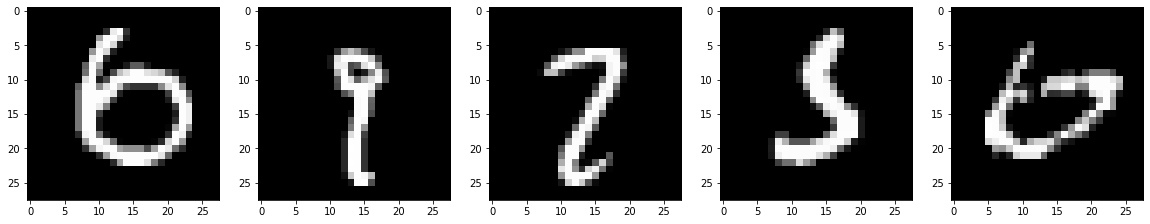

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  index = result_indices[0][i]
  plt.imshow(x_test[index,:,:,0],cmap='gray')
  # plt.axis('off')
  prediction = np.squeeze(np.argmax(model.predict(x_test[index].reshape(1,28,28,1)),axis=1),axis=0)
  print(prediction, end='\t')

# Viewing the activation maps


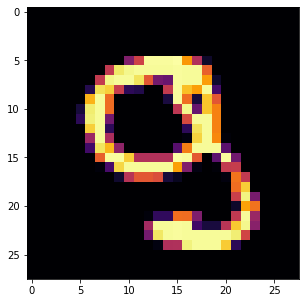

In [ ]:
from tensorflow.keras.models import Model

#extract the output of the top 7 layers-layer outputs
layer_outputs = [layer.output for layer in model.layers[:7]]

#create a model to return those outputs given the model's input
activation_model = Model(inputs=model.input,outputs= layer_outputs)

#display the test image of the activation model
img_tensor = x_test[151].reshape(1,28,28,1)
figure1 = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap='inferno')
plt.axis='off'

In [ ]:
#run the model in predict mode to get the activation layers
# when an image is read, it returns the values of the activation

activations = activation_model.predict(img_tensor)
print("number of activation layers: "+ str(len(activations)))

number of activation layers: 7


In [ ]:
# activation of the first conv layer for the image input
first_layer_activation = activations[0]
print(first_layer_activation.shape)
# print(model.summary())

(1, 26, 26, 32)


The output of the first conv layer is seen to be the same as the shape of the output of the 1st convolutional layer of the model (26x26) feature map with 32 convolutional channels.
We then plot the 4th convolution channel/filter of the activation of the 1st layer of the original model.

# Plot output of 4th conv filter in the 1st conv layer.

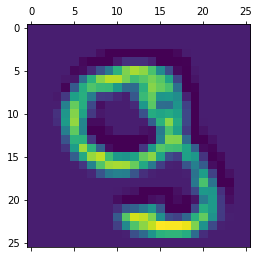

In [ ]:
plt.matshow(first_layer_activation[0,:,:,3],cmap = 'viridis')

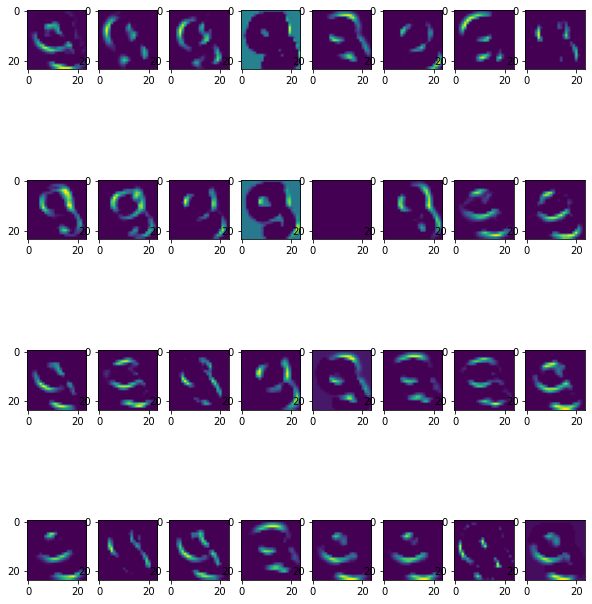

In [ ]:
#create a function to display the activation of a specific layer to show the behaviour of how the model makes a decision

def display_activations(activations,col_size,row_size,act_index):
  activation = activations[act_index]
  activation_index = 0
  fig,ax = plt.subplots(row_size,col_size, figsize=(row_size*2.5,col_size*1.5))
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index],cmap = 'viridis')
      activation_index += 1

display_activations(activations,8,4,1)

# Transfer learning
How we can understand transfer learning. How to use a pre-trained model's work to a different model.

# Assignment- Test model using holdout dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [213]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

#function to prepare the image
def load_my_image(filename):
  # load the image
  img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
  # img = cv2.bitwise_not(img)
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28, 1)
  # prepare pixel data
  img = img.astype('float32')
  #normalize
  img = img / 255.0

  return img


5	3	8	9	7	

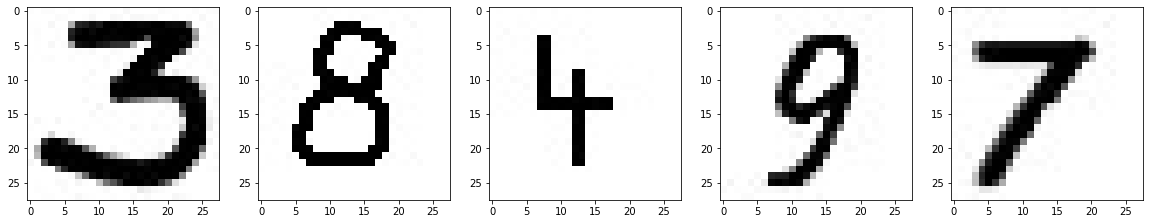

In [225]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

model = load_model('MNIST_Simple_CNN_10-Epoch.h5') 
filepath = "gdrive/My Drive/DIP_Dataset"
csv_file = "gdrive/My Drive/DIP_Dataset.csv"

figure = plt.figure(figsize=(20,20))

for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_index = np.random.randint(1, 30)
  img = image.load_img(filepath +"/" + str(random_index) + ".jpg") #loaded as image to plot
  test_img = load_my_image(filepath +"/" + str(random_index) + ".jpg") #loaded as array to feed as input to the model

  plt.imshow(img,cmap='inferno')
  digit = model.predict_classes(test_img)
  # print(np.squeeze(np.argmax(digit[0],axis=1),axis=0),end = '\t')
  print(digit[0],end = '\t')
  